<a href="https://colab.research.google.com/github/spshreya/datamining/blob/master/Data_mining_pkg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import tarfile
from six.moves import urllib
'''six is a package that helps in writing code that is compatible with both Python 2 and Python 3.
The six.moves module provides those modules under a common name for both Python2 and 3 
(mostly by providing the Python2 module under the name of the Python 3 module).
imports urllib when run with Python3 and imports a mixture of urllib, urllib2 and urlparse with Python2,
mimicking the structure of Python3's urllib'''
DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH="datasets/housing"
HOUSING_URL=DOWNLOAD_ROOT+HOUSING_PATH+"/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path=os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [0]:
DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH="datasets/housing"
HOUSING_URL=DOWNLOAD_ROOT+HOUSING_PATH+"/housing.tgz"
fetch_housing_data(HOUSING_URL,HOUSING_PATH)

In [0]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [23]:
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [24]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [25]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [26]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<function matplotlib.pyplot.show>

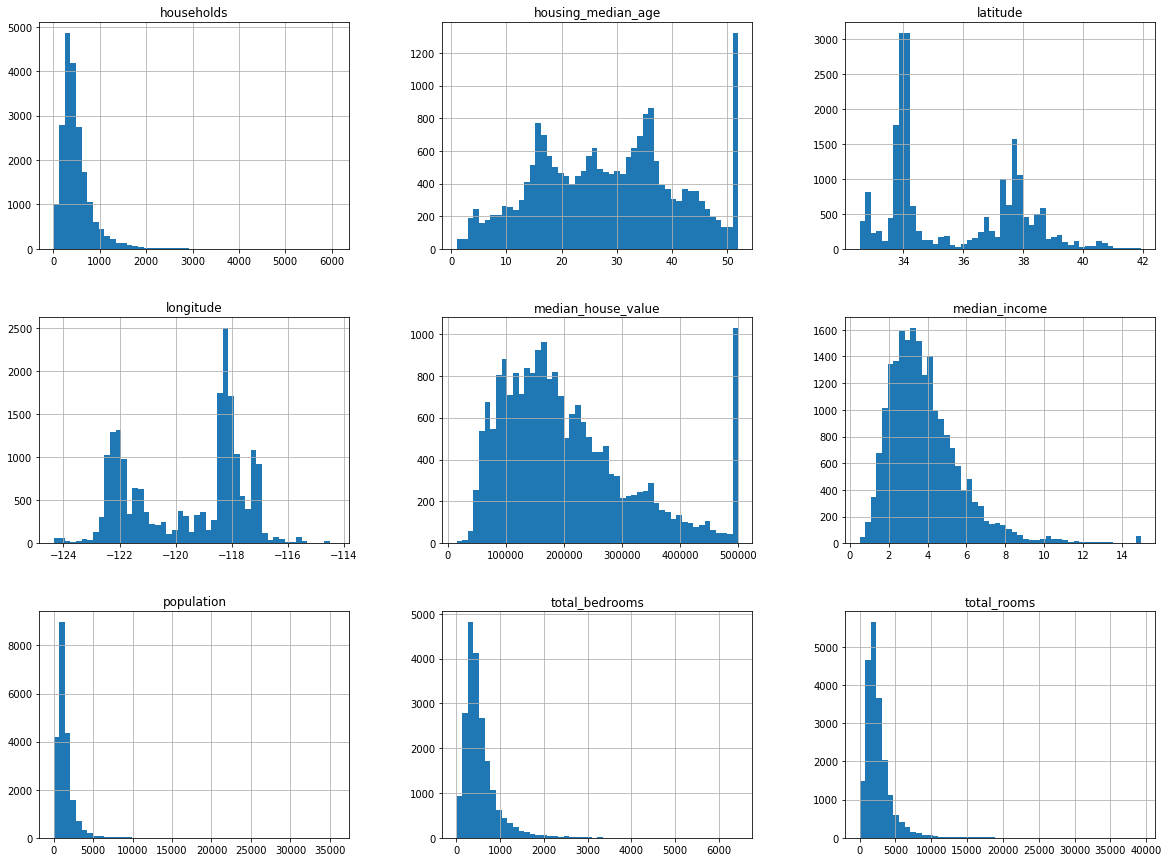

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show

In [0]:
# to avoid overfitting randomization is required
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices] #returns data

In [0]:
train_set, test_set=split_train_test(housing,0.2) #Splitting data into training and testing dataset i.e. 20% & 80%

In [30]:
train_set.shape

(16512, 10)

In [31]:
test_set.shape

(4128, 10)

In [32]:
print(len(train_set),"train data")
print(len(test_set),"test data")

16512 train data
4128 test data


In [0]:
#the abovementioned method generates the random data set (training and test data set) randomely
#i.e. if we run our program 5 times than the code will generate different dataset 5 times 
#hence, our system get to know about entire data set and lead to overfitting

In [0]:
#split into test data & training data 
import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1]<256*test_ratio 
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_:test_set_check(id_,test_ratio,hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [0]:
#A hash function is any function that can be used to map data of arbitrary size to data of fixed size. 
#The values returned by a hash function are called hash values, hash codes, digests, or simply hashes.



In [35]:
from hashlib import md5
md5(b"Hello, CSE-3rd year").digest()

b'Z\xa7Eo?\xcb@\x1a\x13\xf0\xbf}K\xb3\xb9\x8e'

In [36]:
md5(b"Hello, CSE-3rd year").digest()

b'Z\xa7Eo?\xcb@\x1a\x13\xf0\xbf}K\xb3\xb9\x8e'

In [37]:
md5(b"Hello, CSE_3rd year").digest()

b'U\xcavii\xe1\xd9\xee\x8a\xf8b\xab\x9c2\xcc\xa1'

In [0]:
#As this example shows, the MD5 function is deterministic: if you run it twice on the same data, 
#it outputs the same result twice. However, if you run it on two different documents #
#(even if they differ by only one bit), it outputs very different results, seemingly random. #
#This is exactly what we need to shuffle the instance IDs! What we can do is just run the instance IDs 
#through MD5 (or any other hash function), and this will give us a new, 
#seemingly random ID (but actually stable across multiple runs, since hash functions are deterministic).


#Now MD5 outputs a 128 bit number, so if we want to have 20% of the instances in the test set, 
#we can just compute the MD5 of each instance's ID, and if the result is lower than 2^128 * 20%, 
#it goes to the test set, otherwise it goes to the training set. Unfortunately, things get slightly 
#ugly in Python when dealing with MD5, since it actually returns a byte array (with 16 bytes), not a 
#large integer. We could convert the whole byte array to a long 128 bit integer (using the struct module), 
#but instead it is simpler to just pick the last byte of the hash and use it. 
#If we want 20% of our instances to go to the test set, we can just compute the MD5 of the ID, get the last byte 
#out of the result (which will look like a random byte, from 0 to 255), and if that byte is lower or 
#equal to 51 (which is about 20% of 256) then the instance goes to the test set, otherwise it goes to the training set.


In [0]:
housing_with_id=housing.reset_index() #adds an index column
train_set, test_set=split_train_test_by_id(housing_with_id, 0.2, "index")

In [39]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16362 entries, 0 to 20639
Data columns (total 11 columns):
index                 16362 non-null int64
longitude             16362 non-null float64
latitude              16362 non-null float64
housing_median_age    16362 non-null float64
total_rooms           16362 non-null float64
total_bedrooms        16195 non-null float64
population            16362 non-null float64
households            16362 non-null float64
median_income         16362 non-null float64
median_house_value    16362 non-null float64
ocean_proximity       16362 non-null object
dtypes: float64(9), int64(1), object(1)
memory usage: 1.5+ MB


In [0]:
#the abovementioned method is good when none of the tuple be deleted in future. 
#if, there are chances of row deletion then follow the below mentioned method

housing_with_id["id"]=housing["longitude"]*1000+housing["latitude"] # adds a new attribute id in housing based upon longitude and latitude
train_set, test_set=split_train_test_by_id(housing_with_id, 0.2,"id")

In [0]:
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5,5.0, inplace=True)

<function matplotlib.pyplot.show>

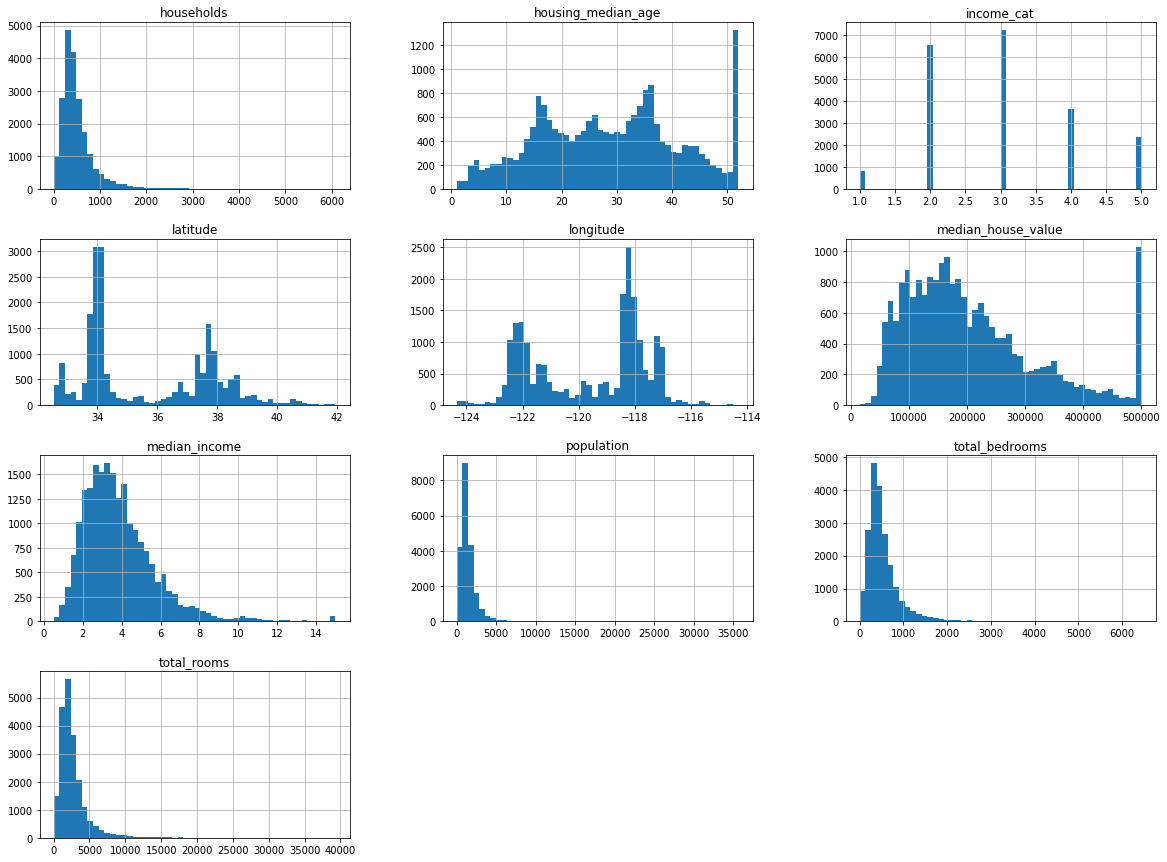

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show

In [0]:
#using stratified sampling using scikit learn
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set= housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [44]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [45]:
housing["median_income"].value_counts()

3.1250     49
15.0001    49
2.8750     46
4.1250     44
2.6250     44
           ..
4.1514      1
1.2614      1
2.0294      1
6.7079      1
3.7306      1
Name: median_income, Length: 12928, dtype: int64